# Classical ML

In [6]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import mlflow
import mlflow.sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

load_dotenv() 

True

# MLflow Tracking Setup

In [ ]:
mlflow.set_tracking_uri(os.getenv("MLFLOW_TRACKING_URI"))
mlflow.set_experiment("Classical ML")

# Load Preprocessed Data

In [7]:
df = pd.read_csv('../data/reddit_preprocessed.csv')
df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1


# Feature Engineering

In [ ]:
# Example: train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_comment'], df['category'], test_size=0.2, random_state=42
)

# Vectorization (Bag-of-Words)
vectorizer = CountVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


# Define models and hyperparameter grids

In [ ]:
models = {
    "LogisticRegression": {
        "model": LogisticRegression(random_state=42),
        "params": {
            "C": [0.1, 1.0, 10.0],
            "max_iter": [100, 200]
        }
    },
    "LinearSVC": {
        "model": LinearSVC(random_state=42),
        "params": {
            "C": [0.1, 1.0, 10.0],
            "max_iter": [1000, 2000]
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [10, 15]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.05, 0.1]
        }
    }
}

# Train Models with GridSearchCv

Training LogisticRegression...


d:\code\mlops-sentiment\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/10/22 22:48:23 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/22 22:48:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogisticRegression_GridSearch at: http://ec2-3-88-58-192.compute-1.amazonaws.com:5000/#/experiments/921268352403098284/runs/4544e64ccb314d97b11ad30f5b6f94c9
🧪 View experiment at: http://ec2-3-88-58-192.compute-1.amazonaws.com:5000/#/experiments/921268352403098284
LogisticRegression Accuracy: 0.8509477703531979
Training LinearSVC...


2025/10/22 22:51:06 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/22 22:51:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LinearSVC_GridSearch at: http://ec2-3-88-58-192.compute-1.amazonaws.com:5000/#/experiments/921268352403098284/runs/70875f2fc1fe46068da604a7ba56dae6
🧪 View experiment at: http://ec2-3-88-58-192.compute-1.amazonaws.com:5000/#/experiments/921268352403098284
LinearSVC Accuracy: 0.8532660575480704
Training RandomForest...


2025/10/22 22:52:16 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/22 22:52:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_GridSearch at: http://ec2-3-88-58-192.compute-1.amazonaws.com:5000/#/experiments/921268352403098284/runs/ecafdc44081541f6b1a7b2e61ac2f893
🧪 View experiment at: http://ec2-3-88-58-192.compute-1.amazonaws.com:5000/#/experiments/921268352403098284
RandomForest Accuracy: 0.6478930860493659
Training GradientBoosting...


2025/10/22 22:55:00 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/10/22 22:55:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run GradientBoosting_GridSearch at: http://ec2-3-88-58-192.compute-1.amazonaws.com:5000/#/experiments/921268352403098284/runs/5f6eac4e50894f2f840202ca60228093
🧪 View experiment at: http://ec2-3-88-58-192.compute-1.amazonaws.com:5000/#/experiments/921268352403098284
GradientBoosting Accuracy: 0.7594436110732306


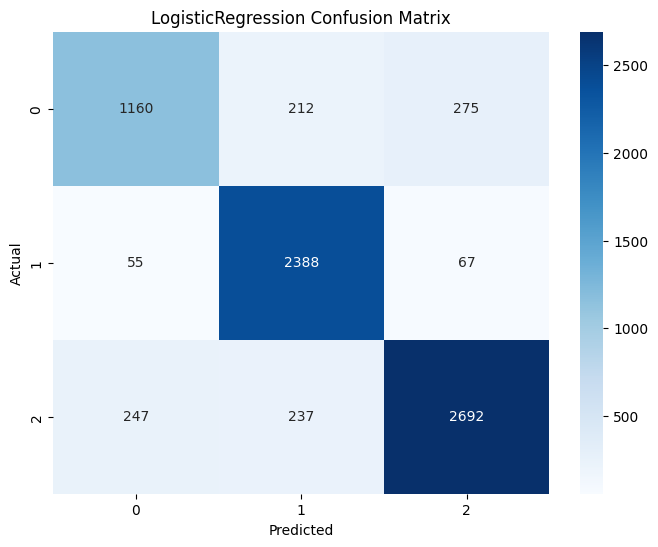

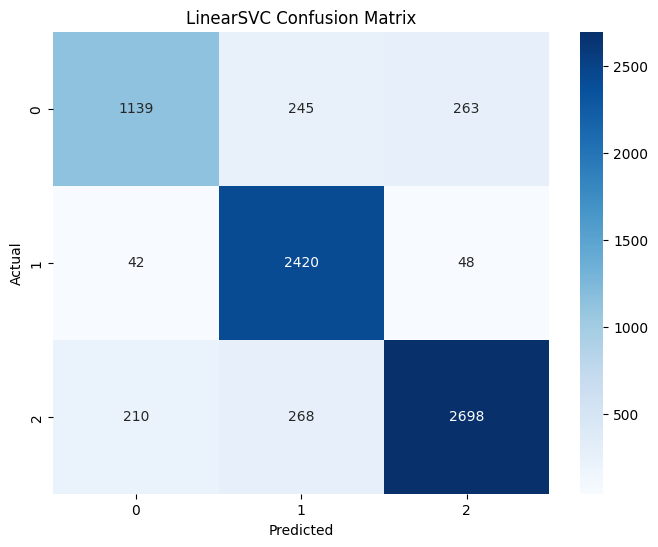

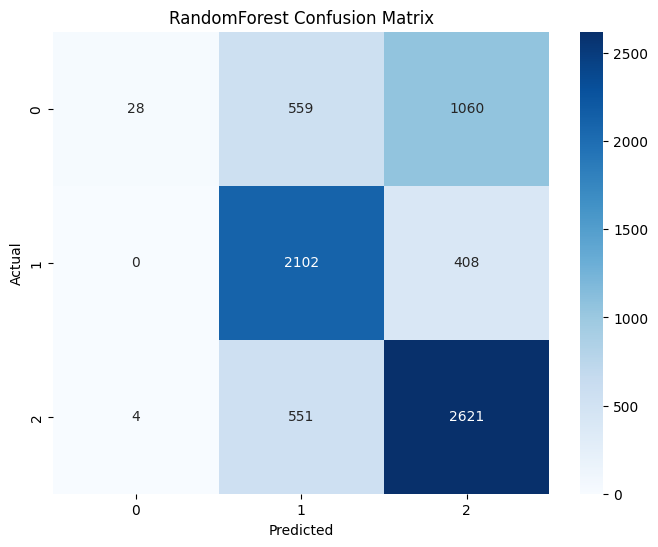

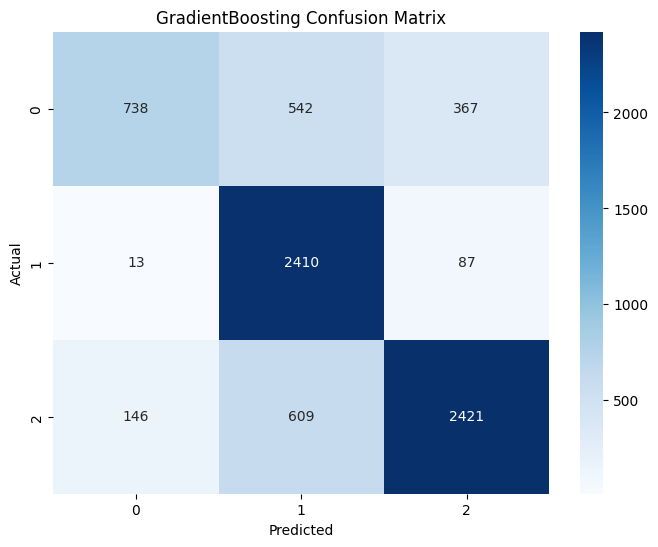

In [10]:
for model_name, mp in models.items():
    print(f"Training {model_name}...")
    
    grid = GridSearchCV(mp["model"], mp["params"], cv=3, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    with mlflow.start_run():
        mlflow.set_tag("mlflow.runName", f"{model_name}_GridSearch")
        mlflow.set_tag("experiment_type", "classical_ml")
        mlflow.set_tag("model_type", model_name)
        
        # Log best params
        for param, value in grid.best_params_.items():
            mlflow.log_param(param, value)
        
        # Log metrics
        mlflow.log_metric("accuracy", acc)
        classification_rep = classification_report(y_test, y_pred, output_dict=True)
        for label, metrics in classification_rep.items():
            if isinstance(metrics, dict):
                for metric, value in metrics.items():
                    mlflow.log_metric(f"{label}_{metric}", value)
        
        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"{model_name} Confusion Matrix")
        plt.savefig(f"{model_name}_conf_matrix.png")
        mlflow.log_artifact(f"{model_name}_conf_matrix.png")
        
        # Log model
        mlflow.sklearn.log_model(best_model, name=f"{model_name}_model")

    print(f"{model_name} Accuracy: {acc}")

## `We can observe that the best performing model was LinearSVC`